# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [106]:
# Details Student 1:
# name : rotem dresler
# id: 209207398
#שם : רותם דרסלר

# Details Student 2:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
#!pip install wn
#!python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
#import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#!pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\rotte


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

# Your implementation:
Write your code solution in the following code-cells

## Step 0: Introduction and Overview

In this Jupyter Notebook, we will explore the process of text classification using machine learning. Text classification involves assigning predefined categories or labels to text data. Our goal is to develop and evaluate machine learning models that can automatically categorize text based on its content.

### Process Overview

1. **Utility Functions**: We will start by defining utility functions that enable us to calculate the F1 score for different machine learning models using various classifiers and vectorizers. These functions will serve as tools for model evaluation.

2. **Classifier and Vectorizer Definitions**: Next, we will define a set of classifiers and vectorizers along with their associated parameters. These definitions will allow us to configure and experiment with different machine learning algorithms.

3. **Model Evaluation and Selection**: This section involves running multiple experiments by combining classifiers and vectorizers. The goal is to identify the best-performing model (classifier and vectorizer combination) on the training dataset. We will visualize the F1 scores obtained from these experiments to assess model performance.

4. **Model Testing and Results**: In the final section, we will apply the best-performing model identified in the previous step to the test dataset. We will make predictions, print results, and analyze the model's performance on unseen data.

This structured approach will provide insights into the effectiveness of various machine learning models for text classification tasks and help us select the best model for practical use.

Relation to Subsequent Sections: Each section builds upon the results and configurations of the previous sections to accomplish specific tasks in the text classification process.

## Step 1: Utility Functions

This section contains utility functions that enable the calculation of the F1 score for different machine learning models using various classifiers and vectorizers. These functions facilitate model evaluation and provide essential tools for later sections.


In [10]:
def get_tokens(story):
    tokens = ht.tokenize(story)
    return ' '.join([token[1] for token in tokens if (token[0] == 'HEBREW') and (len(token[1]) > 1)])

In [11]:
def evaluation_model(classifier, vectorizer, outputs, df_train):
    cv = 10
    n_jobs = -1 
    estimator = Pipeline([('vec', vectorizer['params']['vec'][0]), ('clf', classifier['params']['clf'][0])
                          ])
    param_grid = [dict(classifier['params'], **vectorizer['params'])]
    model = GridSearchCV(estimator=estimator, param_grid=param_grid,
                         scoring='f1_macro', cv=cv, n_jobs=n_jobs, return_train_score=False)

    model.fit(df_train['tokens'], df_train['gender'])

    best_params = {'vec': model.best_params_['vec'], 'clf': model.best_params_['clf']}

    pipeline = Pipeline(list(zip(best_params.keys(), best_params.values())))

    pipeline.fit(df_train['tokens'], df_train['gender'])

    F1_Score = cross_val_score(pipeline, df_train['tokens'], df_train['gender'], scoring='f1_macro', cv=cv, n_jobs=n_jobs).mean()

    outputs['Classifier'].append(classifier['name'])
    outputs['Vectorizer'].append(vectorizer['name'])
    outputs['Classifier best_params'].append(best_params['clf'])
    outputs['Vectorizer best_params'].append(best_params['vec'])
    outputs['F1_Score'].append(F1_Score)
    print(classifier['name'], vectorizer['name'], "F1_Score:", F1_Score)
    

## Step 2: Classifier and Vectorizer Definitions

In this section, we define a set of classifiers and vectorizers along with their associated parameters. These definitions are used to configure and experiment with different machine learning algorithms in later sections.


In [12]:
model_outputs = {
    'Classifier': [],
    'Vectorizer': [],
    'Classifier best_params': [],
    'Vectorizer best_params': [],
    'F1_Score': []
}

In [13]:
classifiers = [
    {'name': 'KNeighborsClassifier', 'params': {'clf': [KNeighborsClassifier()]}},
    {'name': 'MultinomialNB',  'params': {'clf': [MultinomialNB()]}},
    {'name': 'DecisionTreeClassifier', 'params': {'clf': [DecisionTreeClassifier()]}},
    {'name': 'LinearSVC',  'params': {'clf': [LinearSVC()]}},
    {'name': 'SGDClassifier', 'params': {'clf': [SGDClassifier()]}},
    {'name': 'Perceptron', 'params': {'clf': [Perceptron()]}},
]

In [14]:
vectorizers = [
    {'name': 'CountVectorizer', 'params': {'vec': [CountVectorizer()]}},
    {'name': 'TfidfVectorizer', 'params': {'vec': [TfidfVectorizer()]}}
]

## Step 3: Model Evaluation and Selection

This section involves running multiple experiments by combining classifiers and vectorizers defined in the previous section. The goal is to find the best-performing model (classifier and vectorizer combination) on the training dataset. The F1 scores obtained from these experiments are plotted to visualize model performance.

Relation to Previous Section: The classifiers and vectorizers defined in Section 2 are used for experimentation and evaluation.


In [15]:
def get_df_train_outputs(df_train):
    df_train['tokens'] = df_train['story'].apply(get_tokens)

    for classifier in classifiers:
        for vectorizer in vectorizers:
            evaluation_model(classifier, vectorizer, model_outputs, df_train)

    return pd.DataFrame(model_outputs)

In [16]:
df_train_outputs = get_df_train_outputs(df_train)

KNeighborsClassifier CountVectorizer F1_Score: 0.502698547219981
KNeighborsClassifier TfidfVectorizer F1_Score: 0.5960619293646786
MultinomialNB CountVectorizer F1_Score: 0.47157000180302705
MultinomialNB TfidfVectorizer F1_Score: 0.4329778822905296
DecisionTreeClassifier CountVectorizer F1_Score: 0.5800450550628016
DecisionTreeClassifier TfidfVectorizer F1_Score: 0.5961956984899596
LinearSVC CountVectorizer F1_Score: 0.6744670708605568
LinearSVC TfidfVectorizer F1_Score: 0.5394659961137344
SGDClassifier CountVectorizer F1_Score: 0.6066514242058128
SGDClassifier TfidfVectorizer F1_Score: 0.6304251156274225
Perceptron CountVectorizer F1_Score: 0.6245637700880863
Perceptron TfidfVectorizer F1_Score: 0.659570110318638


## Step 4: Model Testing and Results

In this final section, the best-performing model identified in Section 3 is applied to the test dataset to make predictions. The results are then printed and analyzed. This section provides insights into the model's effectiveness on unseen data.

Relation to Previous Section: The best model selected in Section 3 is used for testing on the test dataset.


In [29]:
def plt_df_train_outputs(data):
    custom_palette = sns.color_palette("Oranges")

    best_results_bar = sns.catplot(x='Classifier', y='F1_Score', hue='Vectorizer', data=data,
                                kind='bar', legend=False, palette=custom_palette, alpha=1, height=6, aspect=2.3)

    best_results_bar.set_xlabels("Classifiers", fontsize=15)
    best_results_bar.set_ylabels("F1_Score", fontsize=15)

    plt.title('F1_Score for different [Classifier, Vectorizer]', fontsize=18)

    plt.legend(title="Vectorizer", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    plt.show()


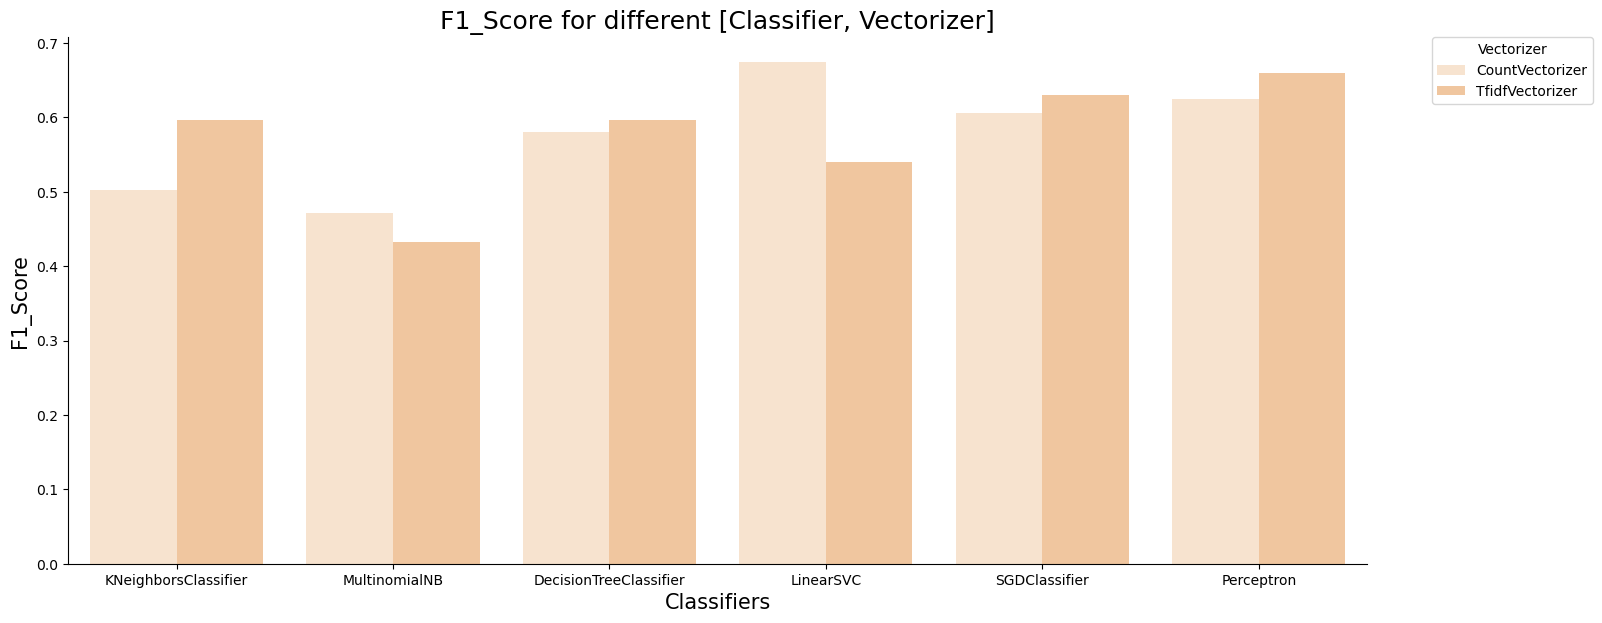

In [30]:
plt_df_train_outputs(df_train_outputs)

In [31]:
def get_df_test(df_test):
    df_test['tokens'] = df_test['story'].apply(get_tokens)

    best_model_series = df_train_outputs.loc[df_train_outputs['F1_Score'].idxmax()]
    pipeline = Pipeline([
        ('vectorizer', best_model_series['Vectorizer best_params']),
        ('classifier', best_model_series['Classifier best_params'])
    ])
    pipeline.fit(df_train['tokens'], df_train['gender'])

    prediction = pipeline.predict(df_test['story'])
    return pd.DataFrame({'test_example_id': df_test['test_example_id'],'predicted_gender': prediction})

In [32]:
df_test_outputs = get_df_test(df_test)
pd.concat([df_test_outputs.head(5), df_test_outputs.tail(5)])


,test_example_id,predicted_gender
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)